# Project Title
# Breast Cancer
Breast cancer classification using machine learning algorithims (Decision Tree,Random Forest, SVM, and Naive Bayes)"

## PROBLEM STATEMENT:

Breast cancer is one of the most common types of cancer among women worldwide. Early detection and accurate diagnosis are crucial for effective treatment and improving survival rates. This project aims to develop and compare the performance of various machine learning algorithms to classify breast cancer tumors as either malignant or benign. The algorithms include Decision Tree, Random Forest, Support Vector Machine (SVM), Kernel SVM, and Naive Bayes.

The goal is to identify the most effective model for accurate classification, providing insights into the strengths and weaknesses of each algorithm. This will assist medical practitioners in making informed decisions based on the predictions of the models.

#About Dataset
##Description:
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

##Acknowledgements:
This dataset has been referred from Kaggle.

##Objective:
Understand the Dataset & cleanup (if required).
Build classification models to predict whether the cancer type is Malignant or Benign.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,accuracy_score
df=pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Step 2
Reading and Loading Dataset

In [ ]:
df.shape

(569, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


# Step 4: Label encoding

In [ ]:
df["diagnosis"] =df["diagnosis"].map({"M":1,"B":0})
x=df.drop(columns=["diagnosis","id"])
y=df["diagnosis"]

Step 5:
## **Spliting Traning and Testing Data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#x_train
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


## Apply Varous Machine Learnong Algorithm

### DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=41)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f"classification report",classification_report(y_test,y_pred))
print(f"confusion matrix", confusion_matrix(y_test,y_pred))
print(f"accuracy {accuracy_score(y_test,y_pred)}")



classification report               precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

confusion matrix [[67  4]
 [ 4 39]]
accuracy 0.9298245614035088


## RANDOM FOREST:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_for=RandomForestClassifier(random_state=101)

rnd_for.fit(x_train,y_train)
y_pred=rnd_for.predict(x_test)
print(f"classification report",classification_report(y_test,y_pred))
print(f"confusion matrix", confusion_matrix(y_test,y_pred))
print(f"accuracy {accuracy_score(y_test,y_pred)}")

classification report               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

confusion matrix [[69  2]
 [ 3 40]]
accuracy 0.956140350877193


#SVM

In [ ]:
from sklearn.svm import SVC
svm_mod=SVC(kernel="linear",random_state=101)
svm_mod.fit(x_train,y_train)
svm_pred=svm_mod.predict(x_test)
print(f"classification report",classification_report(y_test,svm_pred))
print(f"confusion matrix", confusion_matrix(y_test,svm_pred))
print(f"accuracy {accuracy_score(y_test,svm_pred)}")

classification report               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

confusion matrix [[68  3]
 [ 2 41]]
accuracy 0.956140350877193


## NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

# Make predictions on the test data
nb_predictions = nb_model.predict(x_test)

# Evaluate the model
print("Naive Bayes")
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))
print("Accuracy:", accuracy_score(y_test, nb_predictions))

Naive Bayes
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649122807017544


# **Conclusion**

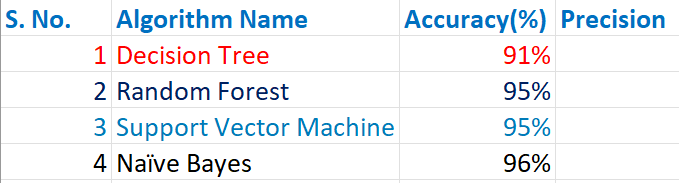

## **As per the theoretical and mathmatical prediction i found that Naive Bayes give me high accuracy but my prefernce**

# **Hyperparameter Tuning (result)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize the SVM model
svm_model = SVC(random_state=101)

# Perform grid search
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2)
grid_search.fit(x_train, y_train)

# Get the best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_

# Make predictions on the test data
best_svm_predictions = best_svm_model.predict(x_test)

# Evaluate the model
print("Best SVM Accuracy:", accuracy_score(y_test, best_svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_svm_predictions))
print("Classification Report:\n", classification_report(y_test, best_svm_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,accuracy_score
df=pd.read_csv('breast-cancer.csv')
df.head()


df.shape

df.info()
df.describe()

df.isna().sum()

df["diagnosis"] =df["diagnosis"].map({"M":1,"B":0})
x=df.drop(columns=["diagnosis","id"])
y=df["diagnosis"]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#x_train
y

## Decision Tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=41)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f"classification report",classification_report(y_test,y_pred))
print(f"confusion matrix", confusion_matrix(y_test,y_pred))
print(f"accuracy {accuracy_score(y_test,y_pred)}")


## Random Forest
from sklearn.ensemble import RandomForestClassifier
rnd_for=RandomForestClassifier(random_state=101)

rnd_for.fit(x_train,y_train)
y_pred=rnd_for.predict(x_test)
print(f"classification report",classification_report(y_test,y_pred))
print(f"confusion matrix", confusion_matrix(y_test,y_pred))
print(f"accuracy {accuracy_score(y_test,y_pred)}")

## SVM
from sklearn.svm import SVC
svm_mod=SVC(kernel="linear",random_state=101)
svm_mod.fit(x_train,y_train)
svm_pred=svm_mod.predict(x_test)
print(f"classification report",classification_report(y_test,svm_pred))
print(f"confusion matrix", confusion_matrix(y_test,svm_pred))
print(f"accuracy {accuracy_score(y_test,svm_pred)}")

## Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

# Make predictions on the test data
nb_predictions = nb_model.predict(x_test)

# Evaluate the model
print("Naive Bayes")
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))
print("Accuracy:", accuracy_score(y_test, nb_predictions))



from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize the SVM model
svm_model = SVC(random_state=101)

# Perform grid search
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2)
grid_search.fit(x_train, y_train)

# Get the best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_

# Make predictions on the test data
best_svm_predictions = best_svm_model.predict(x_test)

# Evaluate the model
print("Best SVM Accuracy:", accuracy_score(y_test, best_svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_svm_predictions))
print("Classification Report:\n", classification_report(y_test, best_svm_predictions))




# Model saving
import joblib
joblib.dump(svm_mod,"breast_cancer_svm_model.pkl")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

['breast_cancer_svm_model.pkl']